In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, impute

# 1 - Time Series

In [12]:
idx = pd.date_range('2020-01-1', '2020-12-1', freq='10H').to_series().to_list()

In [13]:
df = pd.DataFrame()
df['date'] = idx
#df.reset_index(inplace=True)
#df.drop(columns=['index'], inplace=True)

In [14]:
df.head()

,date
0,2020-01-01 00:00:00
1,2020-01-01 10:00:00
2,2020-01-01 20:00:00
3,2020-01-02 06:00:00
4,2020-01-02 16:00:00


In [15]:
df.shape

(805, 1)

In [16]:
df['customer_id'] = np.random.random_integers(low=1,high=26,size=df.shape[0])

In [17]:
df['customer_id'].unique()

array([13, 21,  5, 25, 18,  2,  1,  6, 10, 15,  8,  9, 12, 24, 20, 14, 17,
       11, 23,  3, 26, 16,  4, 22, 19,  7])

In [18]:
def generate_features(df):
    df.loc[:, 'year'] = df['date'].dt.year
    df.loc[:, 'weekofyear'] = df['date'].dt.weekofyear
    df.loc[:, 'month'] = df['date'].dt.month
    df.loc[:, 'dayofweek'] = df['date'].dt.dayofweek
    df.loc[:, 'weekend'] = (df['date'].dt.dayofweek >= 5).astype(int)

    aggs = {}
    aggs['month'] = ['nunique', 'mean']
    aggs['weekofyear'] = ['nunique', 'mean']
    aggs['customer_id'] = ['size']
    aggs['customer_id'] = ['nunique']

    agg_df = df.groupby('customer_id').agg(aggs)
    agg_df = agg_df.reset_index()
    return agg_df

agg_df = generate_features(df)
agg_df


customer_id   month           weekofyear            customer_id
               nunique      mean    nunique       mean     nunique
0            1      11  5.785714         19  23.535714           1
1            2      11  5.875000         26  23.781250           1
2            3      10  5.193548         23  21.129032           1
3            4      11  6.166667         21  24.833333           1
4            5      11  5.794118         23  23.558824           1
5            6      10  6.176471         24  25.441176           1
6            7      10  5.714286         23  23.314286           1
7            8      11  5.657143         27  22.914286           1
8            9      11  5.909091         25  24.151515           1
9           10      10  6.161290         28  25.612903           1
10          11      10  5.441176         22  22.500000           1
11          12      11  5.638889         27  22.944444           1
12          13      10  6.000000         27  24.928571           1
13          14       9  6.166667         19  25.166667           1
14          15      10  6.043478         20  25.130435           1
15          16      12  6.689655         24  28.034483           1
16          17      11  6.486486         26  26.891892           1
17          18      11  6.000000         23  24.827586           1
18          19      11  5.696970         25  23.424242           1
19          20      11  6.911765         26  28.529412           1
20          21      10  6.208333         18  25.458333           1
21          22      11  6.285714         22  25.750000           1
22          23       9  5.700000         21  23.900000           1
23          24      11  6.774194         27  28.290323           1
24          25      11  6.000000         27  24.783784           1
25          26      11  5.967742         25  24.806452           1

In [19]:
x = df['customer_id'].values
feature_dict = {}

feature_dict['mean'] = np.mean(x)
feature_dict['max'] = np.max(x)
feature_dict['min'] = np.min(x)
feature_dict['std'] = np.std(x)
feature_dict['var'] = np.var(x)
feature_dict['ptp'] = np.ptp(x)

## See percentile vs quantile: https://stats.stackexchange.com/a/156787
feature_dict['percentile_10'] = np.percentile(x, 10)
feature_dict['percentile_60'] = np.percentile(x, 60)
feature_dict['percentile_90'] = np.percentile(x, 90)

feature_dict['quantile_5'] = np.quantile(x, 0.05)
feature_dict['quantile_95'] = np.quantile(x, 0.95)
feature_dict['quantile_99'] = np.quantile(x, 0.99)


feature_dict


{'mean': 13.472049689440993,
 'max': 26,
 'min': 1,
 'std': 7.509383043031694,
 'var': 56.39083368697195,
 'ptp': 25,
 'percentile_10': 3.0,
 'percentile_60': 16.0,
 'percentile_90': 24.0,
 'quantile_5': 2.0,
 'quantile_95': 25.0,
 'quantile_99': 26.0}

(array([ 91.,  58., 104.,  64.,  98.,  47.,  95.,  67.,  82.,  99.]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <BarContainer object of 10 artists>)

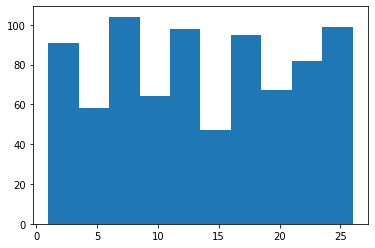

In [20]:
plt.hist(df['customer_id'].values)

# 2 - Polynomial features

In [24]:
df = pd.DataFrame(
    np.random.rand(100, 2),
    columns=[f"f_{i}" for i in range(1, 3)]
)

In [25]:
df.head()

,f_1,f_2
0,0.188737,0.948379
1,0.565490,0.435970
2,0.808873,0.146085
3,0.481188,0.833037
4,0.650433,0.066226


In [29]:
pf = preprocessing.PolynomialFeatures(
    degree=2,
    interaction_only=False,
    include_bias=False
)
pf.fit(df)
poly_feats = pf.transform(df)

num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(
    poly_feats,
    columns=[f"f_{i}" for i in range(1, num_feats+1)]
)

df_transformed

# f_3: f_1**2
# f_4: f_1*f_2
# f_5: f_2**2

,f_1,f_2,f_3,f_4,f_5
0,0.188737,0.948379,0.035621,0.178994,0.899422
1,0.565490,0.435970,0.319779,0.246536,0.190069
2,0.808873,0.146085,0.654275,0.118164,0.021341
3,0.481188,0.833037,0.231542,0.400848,0.693951
4,0.650433,0.066226,0.423063,0.043076,0.004386
...,...,...,...,...,...
95,0.703205,0.732922,0.494498,0.515395,0.537175
96,0.954475,0.153686,0.911022,0.146690,0.023620
97,0.911236,0.862247,0.830352,0.785711,0.743470
98,0.493816,0.320675,0.243854,0.158354,0.102832


# 3- Binning

In [32]:
df_bin = df.copy(deep=True)
df_bin['f_bin_10'] = pd.cut(df['f_1'], bins=10, labels=False)
df_bin['f_bin_100'] = pd.cut(df['f_1'], bins=100, labels=False)
df_bin['f_3'] = np.random.randint(0, 10000, df_bin.shape[0])
df_bin.head()

,f_1,f_2,f_bin_10,f_bin_100,f_3
0,0.188737,0.948379,1,18,3466
1,0.565490,0.435970,5,57,1190
2,0.808873,0.146085,8,82,7397
3,0.481188,0.833037,4,48,7553
4,0.650433,0.066226,6,66,1331


(array([13.,  8.,  9., 13.,  7., 11., 11., 10., 10.,  8.]),
 array([ 131. , 1108.3, 2085.6, 3062.9, 4040.2, 5017.5, 5994.8, 6972.1,
        7949.4, 8926.7, 9904. ]),
 <BarContainer object of 10 artists>)

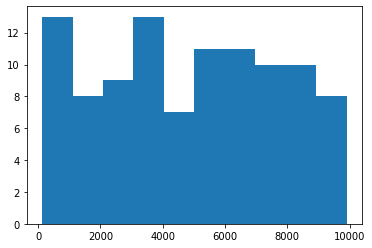

In [33]:
plt.hist(df_bin['f_3'])

In [34]:
df_bin.f_3.var()

8472466.966767676

In [35]:
df_bin.f_3.apply(lambda x: np.log(1+x)).var()

1.0840107844739681

(array([ 3.,  2.,  1.,  5.,  2.,  6.,  8., 16., 27., 30.]),
 array([4.88280192, 5.31460123, 5.74640053, 6.17819983, 6.60999914,
        7.04179844, 7.47359774, 7.90539705, 8.33719635, 8.76899566,
        9.20079496]),
 <BarContainer object of 10 artists>)

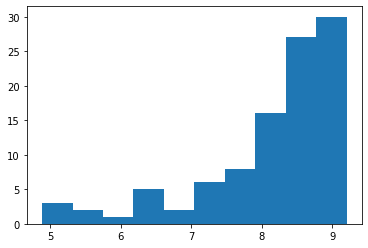

In [36]:
plt.hist(df_bin.f_3.apply(lambda x: np.log(1+x)))

# 4 - KnnImputer

In [39]:
X = np.random.randint(1, 15, (10, 6))
X = X.astype(float)

In [43]:
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan
knn_imputer = impute.KNNImputer(n_neighbors=2)
X_transform = knn_imputer.fit_transform(X)

In [44]:
X

array([[ 6.,  2.,  9., nan,  6., nan],
       [ 2., 10.,  1.,  8.,  3.,  7.],
       [ 8.,  1., 10., nan,  7.,  9.],
       [ 1., nan,  7.,  9.,  5.,  6.],
       [11., 10.,  8., 11., nan,  5.],
       [nan, 12.,  8.,  5., 12., 12.],
       [10.,  2.,  8.,  8., nan,  3.],
       [12., 12., 13.,  1.,  2.,  6.],
       [nan,  1.,  6., 11.,  6.,  4.],
       [ 1.,  3.,  9., nan, nan,  6.]])

In [45]:
X_transform

array([[ 6. ,  2. ,  9. ,  9.5,  6. ,  6.5],
       [ 2. , 10. ,  1. ,  8. ,  3. ,  7. ],
       [ 8. ,  1. , 10. ,  9.5,  7. ,  9. ],
       [ 1. ,  2. ,  7. ,  9. ,  5. ,  6. ],
       [11. , 10. ,  8. , 11. ,  9. ,  5. ],
       [ 6. , 12. ,  8. ,  5. , 12. , 12. ],
       [10. ,  2. ,  8. ,  8. ,  6. ,  3. ],
       [12. , 12. , 13. ,  1. ,  2. ,  6. ],
       [ 3.5,  1. ,  6. , 11. ,  6. ,  4. ],
       [ 1. ,  3. ,  9. , 10. ,  5.5,  6. ]])